<a href="https://colab.research.google.com/github/CarolyneNjoki72/Customer_Segmentation_With_KMeans/blob/master/Customer_data_for_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
n_rows = 500

# Generate Gender
genders = np.random.choice(['Male', 'Female'], size=n_rows)

# Generate Product Bought (5 categories)
products = np.random.choice(
    ['Electronics', 'Clothing', 'Groceries', 'Furniture', 'Sports Equipment'],
    size=n_rows
)

# Generate Price of Product (dependent on product type)
price_ranges = {
    'Electronics': (200, 2000),
    'Clothing': (20, 200),
    'Groceries': (5, 150),
    'Furniture': (150, 3000),
    'Sports Equipment': (30, 800)
}
prices = [np.random.uniform(*price_ranges[p]) for p in products]

# Generate Age (18-70)
ages = np.random.randint(18, 70, size=n_rows)

# Generate Spending Score (1-100)
spending_scores = np.random.randint(1, 101, size=n_rows)

# Generate Annual Income (20k - 150k)
annual_incomes = np.random.randint(20000, 150001, size=n_rows)

# Create DataFrame
df_synthetic = pd.DataFrame({
    'Gender': genders,
    'Product Bought': products,
    'Price of Product': np.round(prices, 2),
    'Age': ages,
    'Spending Score': spending_scores,
    'Annual Income': annual_incomes
})

df_synthetic.head()'''

In [1]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()
for fn in uploaded.keys():
      df = pd.read_csv(io.BytesIO(uploaded[fn]))

Saving synthetic_customer_data.csv to synthetic_customer_data.csv


In [2]:
df.head()

,Gender,Product Bought,Price of Product,Age,Spending Score,Annual Income
0,Male,Sports Equipment,216.70,57,34,61424
1,Female,Sports Equipment,237.32,62,65,129538
2,Male,Electronics,879.11,49,55,73744
3,Male,Groceries,7.91,46,90,90331
4,Male,Clothing,77.97,68,43,30634


In [3]:
df.shape

(500, 6)

In [4]:
df.dtypes

,0
Gender,object
Product Bought,object
Price of Product,float64
Age,int64
Spending Score,int64
Annual Income,int64


In [5]:
df.describe()

,Price of Product,Age,Spending Score,Annual Income
count,500.000000,500.000000,500.000000,500.000000
mean,639.957280,43.862000,48.894000,83074.138000
std,743.175823,14.715027,29.151439,37671.735197
min,6.890000,18.000000,1.000000,20162.000000
25%,109.627500,31.000000,23.000000,49306.750000
50%,335.510000,45.000000,47.000000,80811.500000
75%,843.090000,56.000000,74.000000,114889.250000
max,2971.390000,69.000000,100.000000,149940.000000


In [6]:
df.isnull().sum()

,0
Gender,0
Product Bought,0
Price of Product,0
Age,0
Spending Score,0
Annual Income,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
gender_counts = df['Gender'].value_counts()
gender_counts

,count
Gender,
Female,256
Male,244


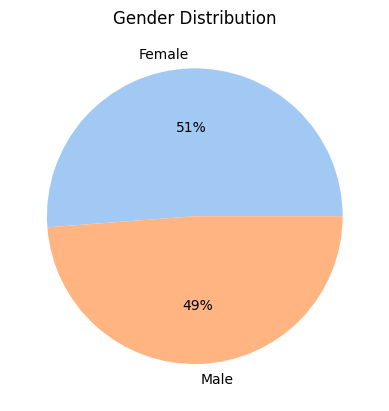

In [10]:
colors = sns.color_palette('pastel')
labels = gender_counts.index
plt.pie(x=gender_counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Gender Distribution')
plt.show()

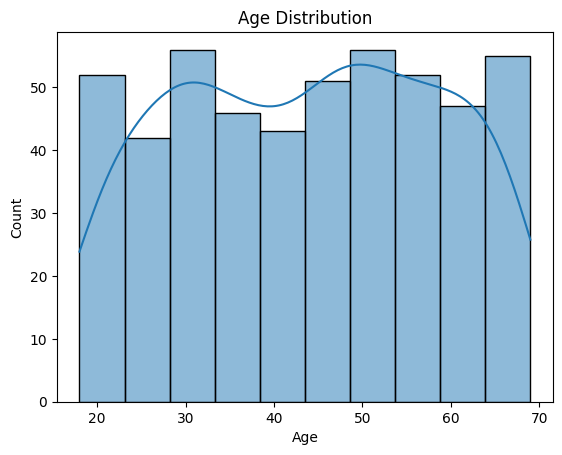

In [11]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

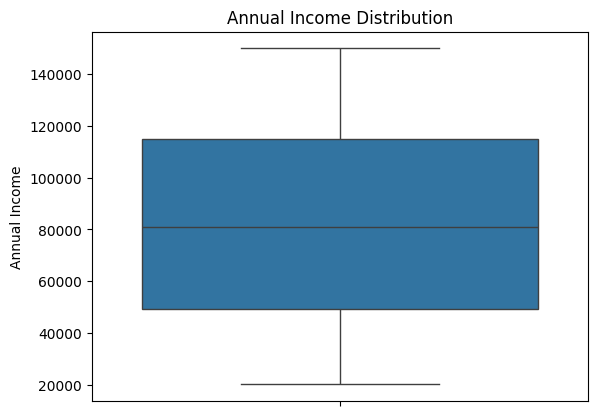

In [12]:
sns.boxplot(df['Annual Income'])
plt.title('Annual Income Distribution')
plt.ylabel('Annual Income')
plt.show()

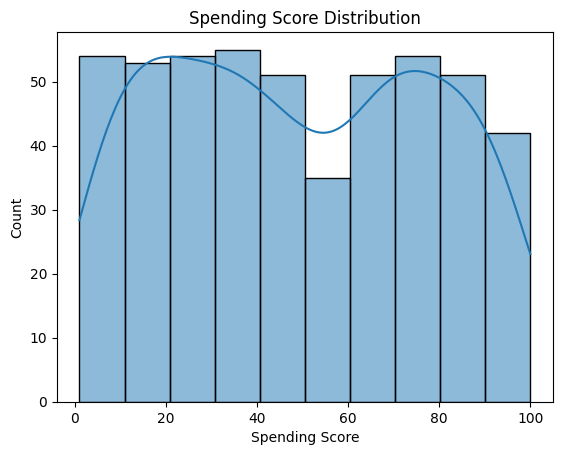

In [13]:
sns.histplot(df['Spending Score'], kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

In [14]:
df.head()

,Gender,Product Bought,Price of Product,Age,Spending Score,Annual Income
0,Male,Sports Equipment,216.70,57,34,61424
1,Female,Sports Equipment,237.32,62,65,129538
2,Male,Electronics,879.11,49,55,73744
3,Male,Groceries,7.91,46,90,90331
4,Male,Clothing,77.97,68,43,30634


In [15]:
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.head()

,Gender,Product Bought,Price of Product,Age,Spending Score,Annual Income,Age Group
0,Male,Sports Equipment,216.70,57,34,61424,56-65
1,Female,Sports Equipment,237.32,62,65,129538,56-65
2,Male,Electronics,879.11,49,55,73744,46-55
3,Male,Groceries,7.91,46,90,90331,46-55
4,Male,Clothing,77.97,68,43,30634,66+


In [33]:
df['Income to price ratio'] = df['Annual Income'] / df['Price of Product']
df.head()

,Gender,Product Bought,Price of Product,Age,Spending Score,Annual Income,Age Group,Income to price ratio
0,Male,Sports Equipment,216.70,57,34,61424,56-65,283.451777
1,Female,Sports Equipment,237.32,62,65,129538,56-65,545.836845
2,Male,Electronics,879.11,49,55,73744,46-55,83.884838
3,Male,Groceries,7.91,46,90,90331,46-55,11419.848293
4,Male,Clothing,77.97,68,43,30634,66+,392.894703


In [34]:
df_dummies = pd.get_dummies(df[['Gender', 'Product Bought', 'Age Group']], dtype=int)
df_dummies.head()

,Gender_Female,Gender_Male,Product Bought_Clothing,Product Bought_Electronics,Product Bought_Furniture,Product Bought_Groceries,Product Bought_Sports Equipment,Age Group_18-25,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_66+
0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,1


In [35]:
df_numerical = df[['Price of Product', 'Spending Score', 'Annual Income', 'Income to price ratio']]
df_new = pd.concat([df_dummies, df_numerical], axis=1)
df_new.head()

,Gender_Female,Gender_Male,Product Bought_Clothing,Product Bought_Electronics,Product Bought_Furniture,Product Bought_Groceries,Product Bought_Sports Equipment,Age Group_18-25,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_66+,Price of Product,Spending Score,Annual Income,Income to price ratio
0,0,1,0,0,0,0,1,0,0,0,0,1,0,216.70,34,61424,283.451777
1,1,0,0,0,0,0,1,0,0,0,0,1,0,237.32,65,129538,545.836845
2,0,1,0,1,0,0,0,0,0,0,1,0,0,879.11,55,73744,83.884838
3,0,1,0,0,0,1,0,0,0,0,1,0,0,7.91,90,90331,11419.848293
4,0,1,1,0,0,0,0,0,0,0,0,0,1,77.97,43,30634,392.894703


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new[['Spending Score', 'Income to price ratio']])


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.5493746480707341


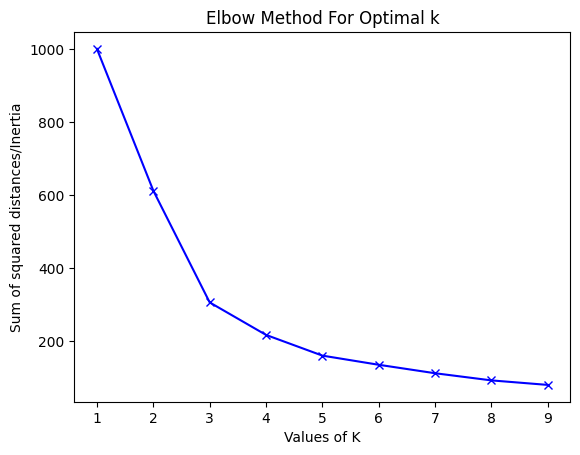

In [38]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, max_iter=300, n_init=10, random_state=42)
 kmeans.fit(scaled_data)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    score = silhouette_score(scaled_data, model.labels_)
    print(f"k={k} → score={score:.3f}")


k=2 → score=0.495
k=3 → score=0.527
k=4 → score=0.549
k=5 → score=0.463
k=6 → score=0.464
k=7 → score=0.475
k=8 → score=0.435
k=9 → score=0.436


In [41]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Spending Score', 'Annual Income', 'Price of Product']])

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_df)

silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.345593129029482


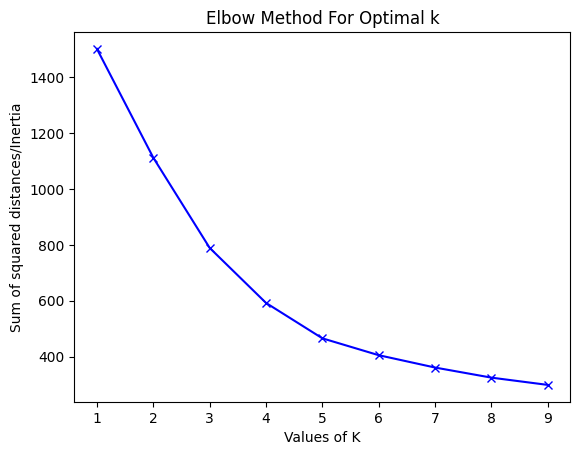

In [43]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, max_iter=300, n_init=10, random_state=42)
 kmeans.fit(scaled_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    print(f"k={k} → score={score:.3f}")

k=2 → score=0.259
k=3 → score=0.271
k=4 → score=0.323
k=5 → score=0.323
k=6 → score=0.346
k=7 → score=0.348
k=8 → score=0.334
k=9 → score=0.291


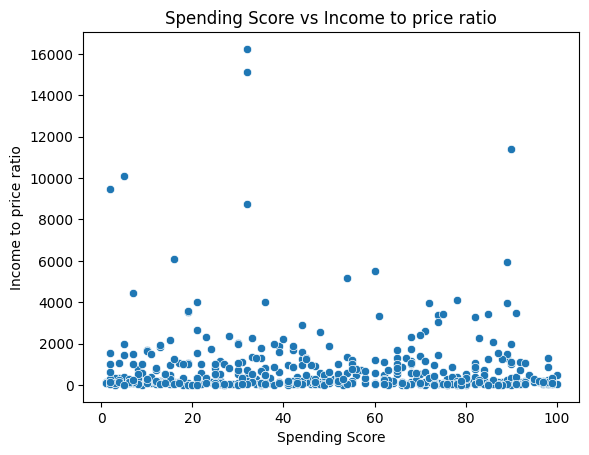

In [46]:
sns.scatterplot(data=df_new, x='Spending Score', y='Income to price ratio')
plt.title('Spending Score vs Income to price ratio')
plt.show()

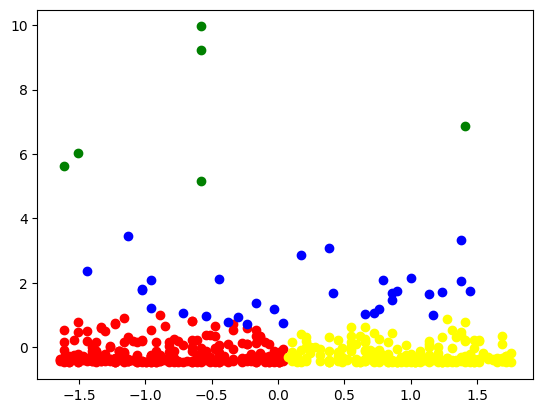

In [49]:
model = KMeans(n_clusters=4, random_state=10)
y_mean = model.fit_predict(scaled_data)
plt.scatter(scaled_data[y_mean == 0,0],scaled_data[y_mean ==0,1], color='red')
plt.scatter(scaled_data[y_mean ==1,0], scaled_data[y_mean==1,1], color= 'blue')
plt.scatter(scaled_data[y_mean ==2,0], scaled_data[y_mean==2,1], color= 'green')
plt.scatter(scaled_data[y_mean ==3,0], scaled_data[y_mean==3,1], color= 'yellow')
plt.show()

🔴 Cluster 1 (Red, bottom-left, dense)

Profile: Low spenders, likely price-sensitive, lower income-to-price ratio.

Campaign:

Discounts & coupons (budget-friendly offers).

Loyalty rewards to encourage frequent small purchases.

Highlight affordability & value-for-money.

🟡 Cluster 2 (Yellow, bottom-right)

Profile: Middle/upper-income, but relatively conservative spenders. They can afford more but don’t.

Campaign:

Cross-selling / upselling (bundle products).

Highlight premium or aspirational products at “entry-level” pricing.

Targeted education campaigns on product benefits (to push them from cautious to confident buyers).

🔵 Cluster 3 (Blue, mid-level spread)

Profile: Medium spenders, moderate income-to-price ratio, balanced.

Campaign:

Personalization — recommend products based on past purchases.

Seasonal campaigns (festive discounts, holiday sales).

Encourage them to join loyalty programs and climb tiers.

🟢 Cluster 4 (Green, top outliers)

Profile: Very high spenders (luxury-oriented), income-to-price ratio is strong, and spending is very high.

Campaign:

VIP campaigns: exclusive previews, first access to new products.

Premium membership with perks (free delivery, dedicated support).

Invite to brand events / ambassador programs.

👉 In short:

Red = Bargain hunters 🛒

Yellow = Careful but capable 💳

Blue = Balanced, average spenders 📊

Green = Big spenders 💎


